In [1]:
import json
import bz2
tweets = []
for line in open('yelp_academic_dataset_business.json', 'r'):
    tweets.append(json.loads(line))

In [2]:
#opening json file
import pandas as pd
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [3]:
#dropping irrelevant columns
drop_columns = ['latitude','longitude','postal_code','state','address','name']
df_b = df_b.drop(drop_columns, axis=1)

In [4]:
df1 = pd.read_csv('review1.csv')

In [5]:
df1=df1.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [6]:
df2 = pd.read_csv('review2.csv')
df2=df2.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [7]:
df3 = pd.read_csv('review3.csv')
df3=df3.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [8]:
df4 = pd.read_csv('review4.csv')
df4=df4.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [9]:
df5 = pd.read_csv('review5.csv')
df5=df5.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [10]:
df6 = pd.read_csv('review6.csv')
df6=df6.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [11]:
df7 = pd.read_csv('review7.csv')
df7=df7.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [12]:
df8 = pd.read_csv('review8.csv')
df8=df8.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [13]:
df9 = pd.read_csv('review9.csv')
df9=df9.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [14]:
df10 = pd.read_csv('review10.csv')
df10=df10.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [15]:
df11 = pd.read_csv('review11.csv')
df11=df11.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [16]:
df12 = pd.read_csv('review12.csv')
df12=df12.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [17]:
df13 = pd.read_csv('review13.csv')
df13=df13.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [18]:
df14 = pd.read_csv('review14.csv')
df14=df14.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [19]:
df15 = pd.read_csv('review15.csv')
df15=df15.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [20]:
df16 = pd.read_csv('review16.csv')
df16=df16.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [21]:
df17 = pd.read_csv('review17.csv')
df17=df17.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [22]:
df18 = pd.read_csv('review18.csv')
df18=df18.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [23]:
#create a dataframe with all the reviews but without the text which is not relevant for the analysis
frames = [df1, df2, df3,df4, df5, df6,df7, df8, df9,df10, df11, df12,df13, df14, df15,df16, df17, df18]
result = pd.concat(frames)

In [24]:
#drop all the elements of the list without attributes
for i in range(len(tweets)):
    if None in tweets[i]:
        tweets.pop(i)

In [25]:
#check if there are any attributes in common
import numpy as np
a=1
for i in range(len(tweets)):
    if np.logical_not('ByAppointmentOnly' in tweets[i]):
        a=0
    if a==0:
        break

In [26]:
#after different check to see if there are any attribbutes in common for the restaurants we decide to drop also attribute column
df_b=df_b.drop('attributes',axis=1)


In [27]:
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_new=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

In [28]:
def contaM(st):
    a=st.get('Monday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaTu(st):
    a=st.get('Tuesday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaW(st):
    a=st.get('Wednesday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaT(st):
    a=st.get('Thursday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaF(st):
    a=st.get('Friday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaSa(st):
    a=st.get('Saturday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaS(st):
    a=st.get('Sunday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]

def converti(st):
    hours=0
    if 'Monday' in st:
        hours+=contaM(st)
    if 'Tuesday' in st:
        hours+=contaTu(st)
    if 'Wednesday' in st:
        hours+=contaW(st)
    if 'Thursday' in st:
        hours+=contaT(st)
    if 'Friday' in st:
        hours+=contaF(st)
    if 'Saturday' in st:
        hours+=contaSa(st)
    if 'Sunday' in st:
        hours+=contaS(st)
    return hours

In [29]:
df_new=df_new.reset_index()

In [30]:
df_new['nhours']=float(0)
for i in range(len(df_new)):
    df_new['nhours'][i]=converti(df_new['hours'][i])

<ipython-input-30-f80e3afcfa7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['nhours'][i]=converti(df_new['hours'][i])


In [31]:
#df_new[df_new['nhours']%1!=0]

In [32]:
df_new=df_new.drop('hours',axis=1)
df_new

,index,business_id,city,stars,review_count,is_open,categories,nhours
0,0,6iYb2HFDywm3zjuRg0shjw,Boulder,4.0,86,1,"Gastropubs, Food, Beer Gardens, Restaurants, B...",84.0
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
2,5,D4JtQNTI4X3KcbzacDJsMw,Vancouver,3.5,169,1,"Restaurants, Thai",28.0
3,7,jFYIsSb7r1QeESVUnXPHBw,Columbus,4.5,11,1,"Breakfast & Brunch, Restaurants",12.0
4,12,HPA_qyMEddpAEtFof02ixg,Peabody,4.0,39,1,"Food, Pizza, Restaurants",62.0
...,...,...,...,...,...,...,...,...
42870,160572,r5Uag1JqYjr2nbxQCVqm8A,Orlando,4.5,437,1,"Restaurants, Noodles, Salad, Vietnamese, Veget...",90.5
42871,160573,Zl6SUy6x9jqjRu2HbtEO6A,Tigard,2.0,48,0,"American (Traditional), Desserts, American (Ne...",87.0
42872,160574,Q78fYV6B6P6GmX07YVgi4g,Bee Cave,3.0,310,1,"Mexican, Bars, Nightlife, Tex-Mex, Restaurants",97.0
42873,160575,uXdQkuEtvLAzfc3MsO-sTQ,Atlanta,3.0,185,1,"Restaurants, Mexican, Latin American",168.0


In [33]:
np.where(df_new.groupby(by = 'city').count()['index'].values==4898)
df_new.groupby(by = 'city').count().index.values[314]


'Portland'

We will focus on the restaurants of Portland

In [55]:
df_city = df_new[df_new['city']=='Portland']
df_city.sample(10)

,index,business_id,city,stars,review_count,is_open,categories,nhours
35599,133625,JYEV5I3e49PwHmVxOhnrLg,Portland,2.0,43,1,"Fast Food, Restaurants, Burgers",125.0
4757,17749,FRRuZX7aAop6ZYBzU8p4SA,Portland,5.0,9,1,"Food, Cafes, Restaurants, Coffee & Tea, Vegan,...",42.0
25794,97278,XyQ8kIUeCuNWGzG6lzP-4Q,Portland,4.0,163,1,"Food, Restaurants, Breakfast & Brunch, Coffee ...",79.5
20717,78299,ElI5gXgm8j2j4Id5gZXvCA,Portland,4.0,312,1,"Breakfast & Brunch, American (Traditional), Di...",42.0
40374,151395,vea_vNiYK0-YU1RPuUpoKg,Portland,4.0,22,1,"Breakfast & Brunch, Vegetarian, Vegan, Mexican...",48.0
42003,157352,9Bm7ASRC0qugEOMS9pbdeg,Portland,3.0,119,0,"Bars, Mexican, Restaurants, Nightlife",70.0
4479,16666,MX0ee_siOqeRwKK4vBGz4w,Portland,3.5,107,1,"Pubs, Food, Brewpubs, Nightlife, Restaurants, ...",92.0
29997,112588,ttjqbClEGjpYaGPQv6BkvA,Portland,4.0,156,1,"Nightlife, Seafood, American (New), Bars, Amer...",63.0
27604,104122,SAP7Myf72pKvEc54Zl45vQ,Portland,4.0,16,1,"Convenience Stores, Bakeries, Restaurants, Sal...",88.0
9104,34387,27bwXf2oYLp2MUtlkihXZw,Portland,4.0,6,0,"Caterers, Event Planning & Services, Barbeque,...",20.0


In [35]:
df_closed = df_city[df_city['is_open']==0]

In [36]:
array_attributes = df_city['categories'].values
attributes_list = []
for i in array_attributes:
    attributes_list.append(i.split(','))
new_list_attributes = [el for sublist in attributes_list for el in sublist]
list_attributes = list(set(new_list_attributes))

In [37]:
df_city[df_city['categories'].str.contains('Restaurants')] 

,index,business_id,city,stars,review_count,is_open,categories,nhours
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
12,36,jx91IMdGOmLOo8h_F9z39g,Portland,3.5,19,1,"Nightlife, Sandwiches, Seafood, Restaurants",114.0
16,50,5PsApTz-WqhF_-8mfqGtGw,Portland,3.5,158,1,"Vegetarian, Vegan, Sandwiches, Soup, American ...",47.0
30,93,HMXiuCxHDXqMH1hBpaHd9g,Portland,5.0,7,0,"Food Stands, Restaurants, Sandwiches",75.0
31,94,ZA3u0Nu5V6TqkcYh8U0zdg,Portland,4.5,131,0,"Restaurants, Food, Sandwiches, Breakfast & Bru...",55.5
...,...,...,...,...,...,...,...,...
42850,160509,ny28j9D88xot0Eq54ojpVQ,Portland,3.5,131,0,"Italian, Restaurants",25.0
42851,160512,7r311z2Uq_UzHqu5hiipxA,Portland,4.0,165,1,"Food Stands, Food, Street Vendors, Restaurants...",63.0
42854,160521,68nXXzFyK8tzcBlv8eM3tw,Portland,3.5,108,1,"Pubs, Breweries, Food, American (Traditional),...",56.0
42859,160537,ER_VMRSD-9FSbw4SGGNQvA,Portland,3.5,13,0,"Fashion, Men's Clothing, Restaurants, Shopping...",49.0


In [38]:
#import matplotlib.pyplot as plt
#for el in set_attributes:
    #sb.countplot(data = df_city[df_city['categories'].str.contains(el)], x='is_open')
    #plt.title(el)
    #plt.show()

In [39]:
df_city[df_city['categories'].str.contains('Pet Services')].groupby(by='is_open').count()

,index,business_id,city,stars,review_count,categories,nhours
is_open,,,,,,,
0,2,2,2,2,2,2,2


In [56]:
cat=df_city.categories.str.replace(' ', '')
cat

1        Salad,Soup,Sandwiches,Delis,Restaurants,Cafes,...
12                Nightlife,Sandwiches,Seafood,Restaurants
16       Vegetarian,Vegan,Sandwiches,Soup,American(New)...
30                       FoodStands,Restaurants,Sandwiches
31       Restaurants,Food,Sandwiches,Breakfast&Brunch,G...
                               ...                        
42850                                  Italian,Restaurants
42851       FoodStands,Food,StreetVendors,Restaurants,Thai
42854    Pubs,Breweries,Food,American(Traditional),Bars...
42859    Fashion,Men'sClothing,Restaurants,Shopping,Wom...
42866    EventPlanning&Services,Steakhouses,Seafood,Ven...
Name: categories, Length: 4898, dtype: object

In [57]:
array_attributes = cat.values
attributes_list = []
for i in array_attributes:
    attributes_list.append(i.split(','))
new_list_attributes = [el for sublist in attributes_list for el in sublist]
list_attributes = list(set(new_list_attributes))

In [41]:
df_city[df_city['categories'].str.contains('Restaurant')].count().values[0]

4898

In [58]:
mag = []
for el in list_attributes:
    if df_city[df_city['categories'].str.contains(el)].count().values[0] > 300:
        mag.append(el)

/Applications/anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [61]:
mag.remove('Restaurants')
mag.remove('Food')
mag

['Burgers',
 'Nightlife',
 'Pizza',
 'Sandwiches',
 'Cafes',
 'Bars',
 'Mexican',
 'Beer']

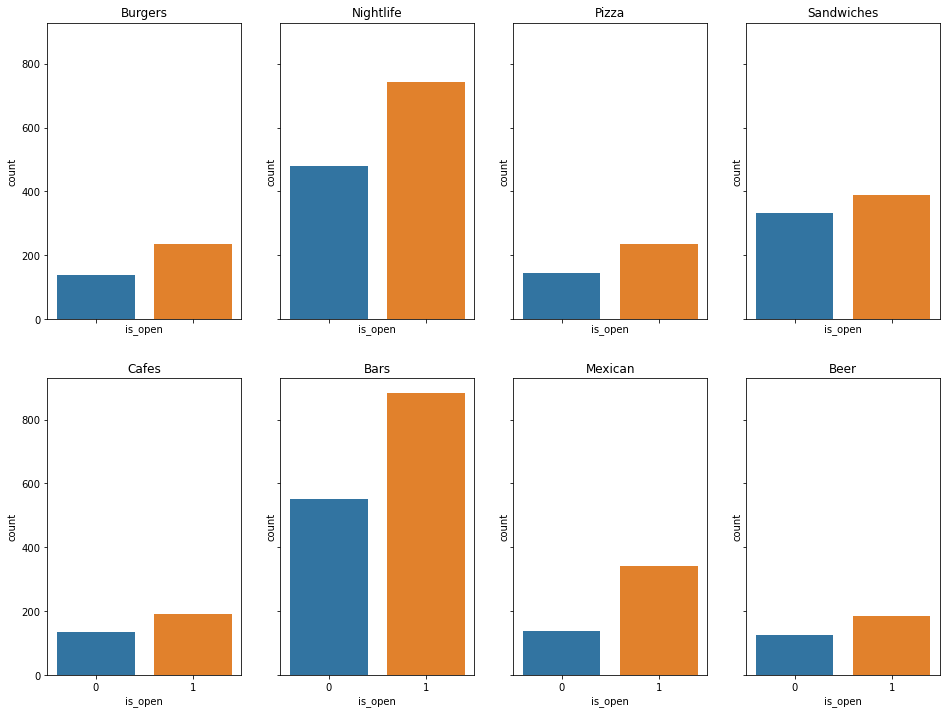

In [60]:
import matplotlib.pyplot as plt
import seaborn as sb
fig, axes = plt.subplots(2,4, sharex=True, sharey= True, figsize = (16,12))
for i in range(4):
    sb.countplot(data = df_city[df_city['categories'].str.contains(mag[i])], x = 'is_open', ax = axes[0, i]).set_title(mag[i])
for i in range(4):
    sb.countplot(data = df_city[df_city['categories'].str.contains(mag[4+i])], x = 'is_open', ax = axes[1, i]).set_title(mag[4+i])

,index,Beer,Mexican,Bars,Cafes,Sandwiches,Pizza,Nightlife,Burgers,business_id,city,stars,review_count,is_open,categories,nhours
1,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
12,36,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,jx91IMdGOmLOo8h_F9z39g,Portland,3.5,19,1,"Nightlife, Sandwiches, Seafood, Restaurants",114.0
16,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5PsApTz-WqhF_-8mfqGtGw,Portland,3.5,158,1,"Vegetarian, Vegan, Sandwiches, Soup, American ...",47.0
30,93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,HMXiuCxHDXqMH1hBpaHd9g,Portland,5.0,7,0,"Food Stands, Restaurants, Sandwiches",75.0
31,94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,ZA3u0Nu5V6TqkcYh8U0zdg,Portland,4.5,131,0,"Restaurants, Food, Sandwiches, Breakfast & Bru...",55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42850,160509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ny28j9D88xot0Eq54ojpVQ,Portland,3.5,131,0,"Italian, Restaurants",25.0
42851,160512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7r311z2Uq_UzHqu5hiipxA,Portland,4.0,165,1,"Food Stands, Food, Street Vendors, Restaurants...",63.0
42854,160521,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,68nXXzFyK8tzcBlv8eM3tw,Portland,3.5,108,1,"Pubs, Breweries, Food, American (Traditional),...",56.0
42859,160537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ER_VMRSD-9FSbw4SGGNQvA,Portland,3.5,13,0,"Fashion, Men's Clothing, Restaurants, Shopping...",49.0


In [82]:
for i in mag:
    array = np.zeros(len(df_city))
    indices_true = np.where(df_city['categories'].str.contains(i).values==True)
    array[indices_true]= 1
    df_city.insert(1, i, array.tolist())

In [94]:
from datetime import datetime
result['date'].values[0]

1412991242.0

In [96]:
for i in range(1,len(result)):
    result['date'].values[i]=datetime.fromisoformat(result['date'].values[i]).timestamp()


In [137]:
dic = {}
for ids in df_city.business_id.values:
    df_temp=result[result['business_id']==ids]
    df_temp.sort_values('date', ascending=False).head(100)
    dic[ids]=df_temp['stars'].head(100).mean()
    
dic    

{'tCbdrRPZA0oiIYSmHG3J0w': 4.18,
 'jx91IMdGOmLOo8h_F9z39g': 3.45,
 '5PsApTz-WqhF_-8mfqGtGw': 3.49,
 'HMXiuCxHDXqMH1hBpaHd9g': 5.0,
 'ZA3u0Nu5V6TqkcYh8U0zdg': 4.27,
 'aTAe3uMYBEwU0FbTMFEI5g': 3.6153846153846154,
 '52f_ztOVodIoV43Qt-R4rA': 4.233333333333333,
 'BGLqNLxH8p3dEoiLVLRq1A': 3.9444444444444446,
 'r_sOAVfNPaXrpjznZpuxeg': 3.94,
 'UKIBQrRbY_jo52yHWcZE8g': 4.123287671232877,
 '7IPhANX229XHo6I5w_BzxA': 4.619047619047619,
 'GyglPdfJM89if_5XSBIN7Q': 4.1,
 '4f1MpunVzcEZ2v4HNQa2uw': 3.85,
 'lyhNDfX8UatlRO5H3Kfccg': 4.82,
 'DgJSDdnPOvLCCyuryIh-3Q': 4.323529411764706,
 'fMZRia9Jq8CXgP3Wna6_gg': 3.91,
 'A2EQ-c_AaRoTmRGfO-HByQ': 3.53,
 '1iU41Mf9FGZACZZmdaemaw': 3.44,
 'Dz3GF5EvC3kzM-Jf_nLCDw': 1.435897435897436,
 'LzqmHdwLkAsd4asB0dc5_A': 4.093023255813954,
 'E4ejoHJHIOvVhkca3kWRuQ': 1.9125,
 'SRHQEF2-VPS_dl1_ZDH0gA': 3.54,
 'cl8_roQGXbifAdRyFlk03g': 3.842696629213483,
 'U4sddbqRBCS4Km-B7y3vBA': 3.9365079365079363,
 'GvLnnALFOCdxdUrUCSfs-Q': 3.32,
 'sJNMic9YAN7rSy8RnHZ0qw': 4.6666666666666

In [145]:
df_to_add = pd.DataFrame(columns=['business_id','medium_stars'])
df_to_add['business_id']=dic.keys()
df_to_add['medium_stars']=dic.values()
df_to_add

,business_id,medium_stars
0,tCbdrRPZA0oiIYSmHG3J0w,4.180000
1,jx91IMdGOmLOo8h_F9z39g,3.450000
2,5PsApTz-WqhF_-8mfqGtGw,3.490000
3,HMXiuCxHDXqMH1hBpaHd9g,5.000000
4,ZA3u0Nu5V6TqkcYh8U0zdg,4.270000
...,...,...
4893,ny28j9D88xot0Eq54ojpVQ,3.630000
4894,7r311z2Uq_UzHqu5hiipxA,3.810000
4895,68nXXzFyK8tzcBlv8eM3tw,3.400000
4896,ER_VMRSD-9FSbw4SGGNQvA,3.692308


In [150]:
df_final = pd.merge(df_to_add, df_city)
df_final=df_final.drop('categories',axis=1)

In [151]:
df_final

,business_id,medium_stars,index,Beer,Mexican,Bars,Cafes,Sandwiches,Pizza,Nightlife,Burgers,city,stars,review_count,is_open,nhours
0,tCbdrRPZA0oiIYSmHG3J0w,4.180000,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Portland,4.0,126,1,90.0
1,jx91IMdGOmLOo8h_F9z39g,3.450000,36,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Portland,3.5,19,1,114.0
2,5PsApTz-WqhF_-8mfqGtGw,3.490000,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Portland,3.5,158,1,47.0
3,HMXiuCxHDXqMH1hBpaHd9g,5.000000,93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Portland,5.0,7,0,75.0
4,ZA3u0Nu5V6TqkcYh8U0zdg,4.270000,94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Portland,4.5,131,0,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,ny28j9D88xot0Eq54ojpVQ,3.630000,160509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,131,0,25.0
4894,7r311z2Uq_UzHqu5hiipxA,3.810000,160512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,4.0,165,1,63.0
4895,68nXXzFyK8tzcBlv8eM3tw,3.400000,160521,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Portland,3.5,108,1,56.0
4896,ER_VMRSD-9FSbw4SGGNQvA,3.692308,160537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,13,0,49.0
